In [1]:
# Import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Find main working repository
import sys
import os
sys.path.append(os.path.join(os.path.abspath('..')))

In [3]:
import src.data_loading as dl
import scripts.data_cleaning as dc
import src.visualizations as v

In [4]:
'''
file_ids = ['1ui98TWYt725H4oD0forEIMLPeSWb_w_w', '1NBBhkA1p05W-bHjGkWMTaztuxmn9TLpK', 
           '17CzoQKGEtMFuKNU13IykmD0oH2nInhrg', '1wFys9ps6YX6KOqcF87LRAjVQsLpLsc-G']
file_names = ['Xente_Variable_Definitions.xlsx', 'Xente_Variable_Definitions.csv',
              'data.xlsx', 'data.csv']
output_dir = '../data/raw'

# Download the file from google drive 
dl.download_file_from_google_drive(file_ids, output_dir, file_names)
'''

"\nfile_ids = ['1ui98TWYt725H4oD0forEIMLPeSWb_w_w', '1NBBhkA1p05W-bHjGkWMTaztuxmn9TLpK', \n           '17CzoQKGEtMFuKNU13IykmD0oH2nInhrg', '1wFys9ps6YX6KOqcF87LRAjVQsLpLsc-G']\nfile_names = ['Xente_Variable_Definitions.xlsx', 'Xente_Variable_Definitions.csv',\n              'data.xlsx', 'data.csv']\noutput_dir = '../data/raw'\n\n# Download the file from google drive \ndl.download_file_from_google_drive(file_ids, output_dir, file_names)\n"

In [5]:
# Load the data into a DataFrame
output_path = '../data/raw'
df = pd.read_csv(output_path + '/data.csv')

## Explore the Data

In [6]:
# Display the first few rows of the data set
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [35]:
df = df.applymap(lambda x: x.split('_', 1)[1] if isinstance(x, str) and x.split('_', 1)[0] in df.columns else x)

C:\Users\Hp\AppData\Local\Temp\ipykernel_16716\1852935690.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.split('_', 1)[1] if isinstance(x, str) and x.split('_', 1)[0] in df.columns else x)


In [36]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [37]:
# View the data missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [8]:
# Get the shape of the data 
df.shape

(95662, 16)

In [9]:
# Summary the statistics 
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [10]:
# Identify Categorical and Numerical Data
numerical_data = df.select_dtypes(include=['number'])
categorical_data = df.select_dtypes(include=['object'])

In [11]:
# Identify categorical and numerical clumns in the data 
print("Categorical data:", categorical_data.columns)
print("Numerical Data:", numerical_data.columns)

Categorical data: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')
Numerical Data: Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult'], dtype='object')


View Columns description

In [12]:
# Load description data
dc_df = pd.read_csv(output_path + '/Xente_Variable_Definitions.csv')

In [13]:
# Create a pivot table (though in this case, it's more of a formatted display)
pivot_table = dc_df.pivot_table(index='Column Name', values='Definition', aggfunc=lambda x: ' '.join(x))

In [14]:
print(pivot_table.to_string())

                                                                                                                             Definition
Column Name                                                                                                                            
AccountId                                                                            Unique number identifying the customer on platform
Amount                Value of the transaction. Positive for debits from customer account and negative for credit into customer account
BatchId                                                                Unique number assigned to a batch of transactions for processing
ChannelId                                                          Identifies if customer used web,Android, IOS, pay later or checkout.
CountryCode                                                                                      Numerical geographical code of country
CurrencyCode                                    

## Data Cleaning 

In [15]:
dc.calculat_missing_percentage(df)

The dataset has 0.0% missing values.


In [16]:
dc.check_missing_values(df)

,Missing Values,% of Total Values,Data Types
TransactionId,0,0.0,object
BatchId,0,0.0,object
AccountId,0,0.0,object
SubscriptionId,0,0.0,object
CustomerId,0,0.0,object
CurrencyCode,0,0.0,object
CountryCode,0,0.0,int64
ProviderId,0,0.0,object
ProductId,0,0.0,object
ProductCategory,0,0.0,object


### Distribution of numerical features

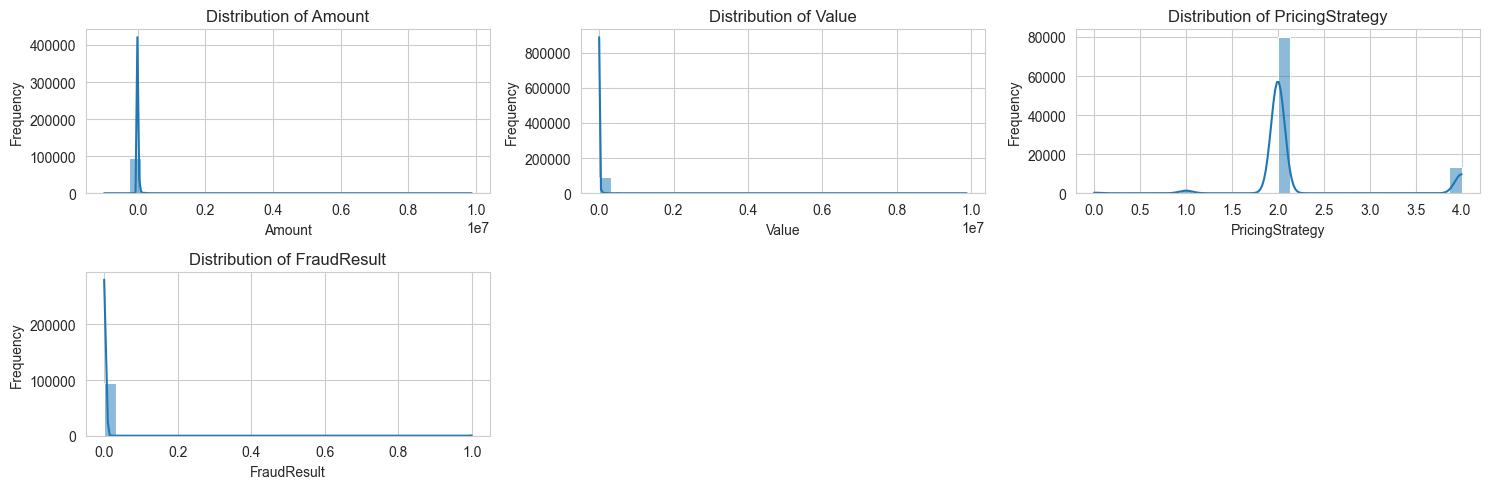

In [21]:
numerical_columns = ['Amount', 'Value','PricingStrategy', 'FraudResult']
v.numerical_distribution(df, numerical_columns)

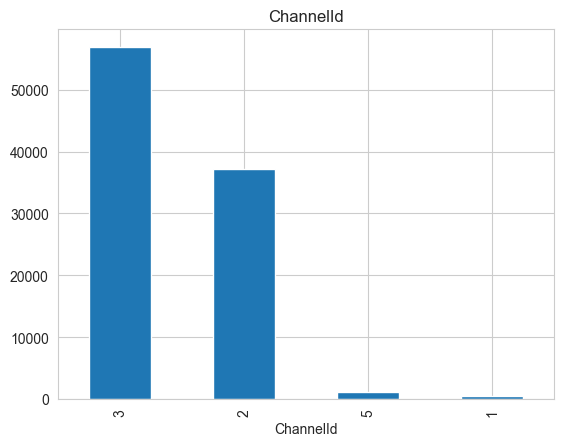

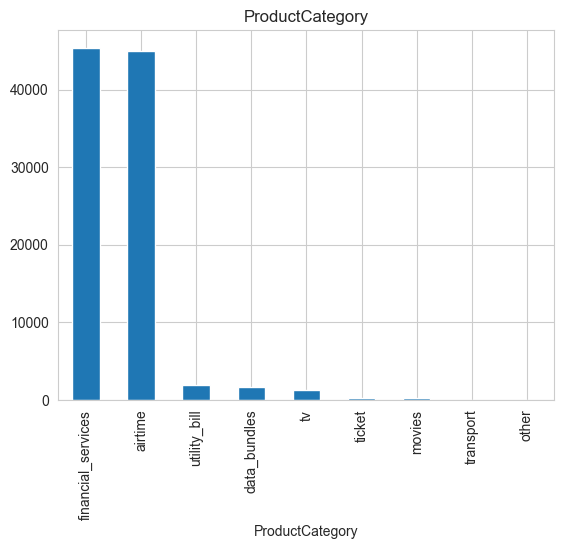

In [38]:
# Task 4: Distribution of Categorical Features
categorical_features = ['ChannelId', 'ProductCategory']
for feature in categorical_features:
    df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.show()

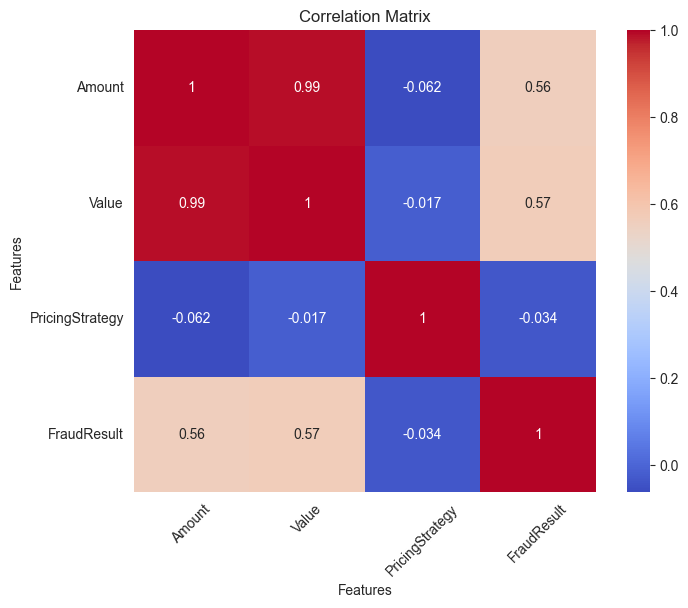

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Task 5: Correlation Analysis
numerical_features = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, annot_kws={"size": 10})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


Outlier detection

In [40]:
dc.check_outliers(df, df['TransactionId'])

KeyError: '76871'

<Figure size 1000x600 with 0 Axes>